In [50]:
!pip install gdown
!gdown 1QLdhUoG9qyxm_-9rCOWHz2aFit8WbiZ1

Downloading...
From: https://drive.google.com/uc?id=1QLdhUoG9qyxm_-9rCOWHz2aFit8WbiZ1
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 17.6MB/s]


#3-1

In [51]:
import pandas as pd
df = pd.read_csv('/content/drug200.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import graphviz
from IPython.display import Image, display
import pydotplus

In [80]:
data = pd.read_csv('drug200.csv')
age = data['Age']
#replacing labels
for i in range(200):
  if age[i] <= 40:
     age[i]= 'young'
  elif  40 < age[i] < 65:
    age[i] = 'adult'
  elif age[i] >= 65:
    age[i] = 'old'
#replacing in data
data['Age'] = age
data

<ipython-input-80-2645aecc3713>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i]= 'young'


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,young,F,HIGH,HIGH,25.355,drugY
1,adult,M,LOW,HIGH,13.093,drugC
2,adult,M,LOW,HIGH,10.114,drugC
3,young,F,NORMAL,HIGH,7.798,drugX
4,adult,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,adult,F,LOW,HIGH,11.567,drugC
196,young,M,LOW,HIGH,12.006,drugC
197,adult,M,NORMAL,HIGH,9.894,drugX
198,young,M,NORMAL,NORMAL,14.020,drugX


In [81]:
na = data['Na_to_K']
# between 6.27 & 38.2
#replacing labels
for i in range(200):
  if na[i] <=15:
     na[i]= 'Normal'
  elif na[i] > 15:
     na[i] = 'High'
#replacing in data
data['Na_to_K'] = na

<ipython-input-81-5342cbbecfbc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na[i] = 'High'


In [100]:
print(data)

       Age Sex      BP Cholesterol Na_to_K   Drug
0    young   F    HIGH        HIGH    High  drugY
1    adult   M     LOW        HIGH  Normal  drugC
2    adult   M     LOW        HIGH  Normal  drugC
3    young   F  NORMAL        HIGH  Normal  drugX
4    adult   F     LOW        HIGH    High  drugY
..     ...  ..     ...         ...     ...    ...
195  adult   F     LOW        HIGH  Normal  drugC
196  young   M     LOW        HIGH  Normal  drugC
197  adult   M  NORMAL        HIGH  Normal  drugX
198  young   M  NORMAL      NORMAL  Normal  drugX
199  young   F     LOW      NORMAL  Normal  drugX

[200 rows x 6 columns]


In [101]:
np.random.seed(64)
# Convert DataFrame to a numpy array
array = df.values  #  numpy array
np.random.shuffle(array)  # Shuffle the array
shuffled_df = pd.DataFrame(array, columns=df.columns)
print(shuffled_df)
from sklearn.model_selection import train_test_split
train_data, test_data= train_test_split(data, test_size= 0.15, random_state=64)
# Print shape of each set
print(f"train_data shape: {train_data.shape}")
print(f"test_data shape: {test_data.shape}")

    Age Sex      BP Cholesterol Na_to_K   Drug
0    60   M  NORMAL      NORMAL  10.091  drugX
1    21   F    HIGH      NORMAL  28.632  drugY
2    58   F    HIGH      NORMAL  14.239  drugB
3    31   M    HIGH      NORMAL  11.227  drugA
4    50   F  NORMAL        HIGH  12.703  drugX
..   ..  ..     ...         ...     ...    ...
195  67   M  NORMAL      NORMAL  10.898  drugX
196  68   F    HIGH      NORMAL  10.189  drugB
197  58   F     LOW        HIGH  26.645  drugY
198  61   F    HIGH        HIGH  25.475  drugY
199  16   M     LOW        HIGH  12.006  drugC

[200 rows x 6 columns]
train_data shape: (170, 6)
test_data shape: (30, 6)


In [102]:
target='Drug'
labels = data[target]
len(labels), labels.unique(), labels.value_counts()

(200,
 array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object),
 Drug
 drugY    91
 drugX    54
 drugA    23
 drugC    16
 drugB    16
 Name: count, dtype: int64)

##  Entropy

\begin{align}
\text{Entropy}(Y) = -\sum_{i=1}^{C} p_i \log_2(p_i)
\end{align}

In [103]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))

## Information Gain

\begin{align}
\text{Information Gain}(\text{Feature}) = \text{Entropy}(\text{Parent}) - \sum_{\text{value} \in \text{Feature}} \frac{|\text{Subset with value}|}{|\text{Parent}|} \times \text{Entropy}(\text{Subset with value})
\end{align}

In [104]:
def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

In [106]:
data.iloc[:, :-1].columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [105]:
[information_gain(train_data, feature, 'Drug') for feature in data.iloc[:, :-1].columns]

[0.13242724941072526,
 0.01171632082978702,
 0.6103892717470065,
 0.10391927549041258,
 0.9951022712641692]

In [107]:
np.argmax([information_gain(train_data, feature, 'Drug') for feature in data.iloc[:, :-1].columns])

4

##Node

In [108]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'

##make_tree

In [109]:
def make_tree(data, target):
    # leaf node?
    if len(data[target].unique()) == 1:
        return Node(label=data[target].iloc[0])

    features = data.drop(target, axis=1).columns
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])

    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]

    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]

    # make a node
    node = Node(feature=best_feature)

    # loop over the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)
        # display(subset)

        node.children[value] = make_tree(subset, target)

    return node

In [110]:
tree = make_tree(train_data, 'Drug')
tree

DecisionNode(feature="Na_to_K", children={'Normal': DecisionNode(feature="BP", children={'LOW': DecisionNode(feature="Cholesterol", children={'HIGH': LeafNode(label="drugC"), 'NORMAL': LeafNode(label="drugX")}), 'HIGH': DecisionNode(feature="Age", children={'old': LeafNode(label="drugB"), 'adult': DecisionNode(feature="Sex", children={'M': DecisionNode(feature="Cholesterol", children={'HIGH': LeafNode(label="drugA"), 'NORMAL': LeafNode(label="drugA")}), 'F': DecisionNode(feature="Cholesterol", children={'NORMAL': LeafNode(label="drugB"), 'HIGH': LeafNode(label="drugB")})}), 'young': LeafNode(label="drugA")}), 'NORMAL': LeafNode(label="drugX")}), 'High': LeafNode(label="drugY")})

In [111]:
tree.feature

'Na_to_K'

##plot tree

In [112]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()

    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

'decision_tree.png'

#3-2

In [115]:
def predict(node, sample):
    if node.feature is None:
        return node.label

    feature_value = sample[node.feature]

    if feature_value in node.children:
        return predict(node.children[feature_value], sample)
    else:
        return node.label

In [116]:
[predict(tree, sample) for _, sample in test_data.iterrows()]

['drugX',
 'drugY',
 'drugB',
 'drugA',
 'drugX',
 'drugX',
 'drugY',
 'drugC',
 'drugX',
 'drugY',
 'drugY',
 'drugY',
 'drugX',
 'drugY',
 'drugY',
 'drugC',
 'drugY',
 'drugY',
 'drugX',
 'drugY',
 'drugX',
 'drugX',
 'drugY',
 'drugX',
 'drugY',
 'drugX',
 'drugY',
 'drugX',
 'drugX',
 'drugA']

In [119]:
actual = test_data.reset_index(drop=True)
actual['Drug']

0     drugX
1     drugY
2     drugB
3     drugA
4     drugX
5     drugX
6     drugY
7     drugC
8     drugX
9     drugY
10    drugY
11    drugY
12    drugX
13    drugY
14    drugY
15    drugC
16    drugY
17    drugY
18    drugX
19    drugY
20    drugX
21    drugX
22    drugY
23    drugX
24    drugY
25    drugX
26    drugY
27    drugX
28    drugX
29    drugA
Name: Drug, dtype: object

##using Sklearn

In [131]:
data = pd.read_csv('drug200.csv')
#sex
sex = data['Sex']
#replacing labels
for i in range(200):
  if sex[i] == 'M':
     sex[i]= 0
  else:
     sex[i] = 1
data['Sex'] = sex
#BP
bp = data['BP']
#replacing labels
for i in range(200):
  if bp[i] == 'LOW':
     bp[i]= 0
  elif bp[i] == 'NORMAL':
     bp[i] = 1
  else:
     bp[i] = 2
data['BP'] = bp
#CH
ch = data['Cholesterol']
for i in range(200):
  if ch[i] == 'NORMAL':
     ch[i]= 0
  else:
     ch[i] = 1
data['Cholesterol'] = ch

<ipython-input-131-f739f3c8170d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex[i] = 1
<ipython-input-131-f739f3c8170d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex[i]= 0
<ipython-input-131-f739f3c8170d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex[i]= 0
<ipython-input-131-f739f3c8170d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [132]:
print(data)

     Age Sex BP Cholesterol  Na_to_K   Drug
0     23   1  2           1   25.355  drugY
1     47   0  0           1   13.093  drugC
2     47   0  0           1   10.114  drugC
3     28   1  1           1    7.798  drugX
4     61   1  0           1   18.043  drugY
..   ...  .. ..         ...      ...    ...
195   56   1  0           1   11.567  drugC
196   16   0  0           1   12.006  drugC
197   52   0  1           1    9.894  drugX
198   23   0  1           0   14.020  drugX
199   40   1  0           0   11.349  drugX

[200 rows x 6 columns]


In [134]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
np.random.seed(64)
# Convert DataFrame to a numpy array
array = data.values  #  numpy array
np.random.shuffle(array)  # Shuffle the array
shuffled_df = pd.DataFrame(array, columns=df.columns)
X_train, X_test, y_train, y_test = train_test_split(shuffled_df.drop(['Drug'], axis=1), shuffled_df['Drug'], test_size=0.15, random_state=64)
#tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=64, ccp_alpha=0.1)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=3,
                       random_state=64)

[Text(0.625, 0.875, 'x[4] <= 14.627\nentropy = 1.956\nsamples = 170\nvalue = [18, 14, 13, 48, 77]'),
 Text(0.5, 0.625, 'x[2] <= 1.5\nentropy = 1.759\nsamples = 93\nvalue = [18, 14, 13, 48, 0]'),
 Text(0.25, 0.375, 'x[2] <= 0.5\nentropy = 0.747\nsamples = 61\nvalue = [0, 0, 13, 48, 0]'),
 Text(0.125, 0.125, 'entropy = 0.996\nsamples = 28\nvalue = [0, 0, 13, 15, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 0, 33, 0]'),
 Text(0.75, 0.375, 'x[0] <= 50.0\nentropy = 0.989\nsamples = 32\nvalue = [18, 14, 0, 0, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 77\nvalue = [0, 0, 0, 0, 77]')]

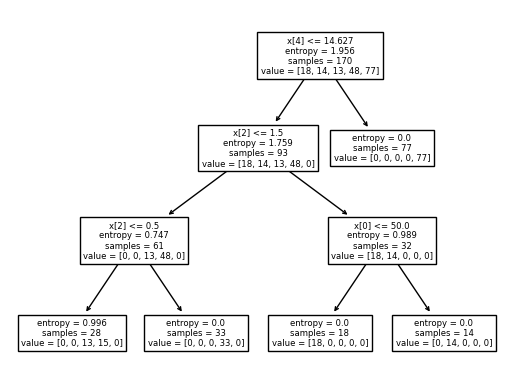

In [136]:
tree.plot_tree(clf)

In [137]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


##Confusion Matrix

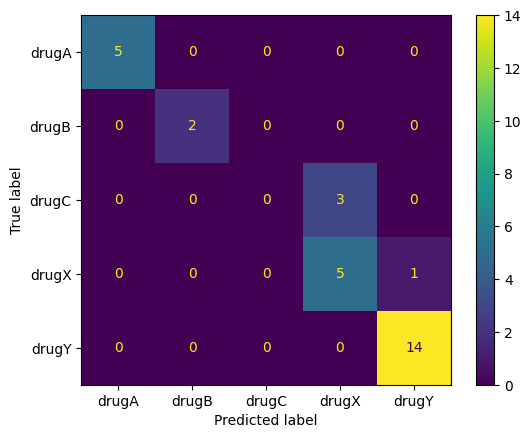

In [143]:
# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Determine unique class labels
unique_labels = np.unique(y)
# Create ConfusionMatrixDisplay
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=unique_labels)

# Plot and show the confusion matrix
cm_display.plot()
plt.show()

##Evaluation

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.87
Precision: 0.79
Recall: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##hyperparameter effect

In [160]:
 #different max_depth
depths = [1, 2, 3, 4, 5, 6, 7, 8]
for depth in depths:
    clf =DecisionTreeClassifier(criterion='entropy',max_depth=depth, random_state=64, ccp_alpha=0.1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Max Depth: {depth}, Accuracy: {accuracy:.2f}')

Max Depth: 1, Accuracy: 0.63
Max Depth: 2, Accuracy: 0.80
Max Depth: 3, Accuracy: 0.87
Max Depth: 4, Accuracy: 0.97
Max Depth: 5, Accuracy: 0.97
Max Depth: 6, Accuracy: 0.97
Max Depth: 7, Accuracy: 0.97
Max Depth: 8, Accuracy: 0.97
Max Depth: 24220, Accuracy: 0.97


In [165]:
 #different max_depth
ccp= [0.001, 0.01, 0.1, 0.5, 1, 3, 6, 9]
for ccpalpha in ccp:
    clf =DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=64, ccp_alpha=ccpalpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'ccp_alpha: {ccpalpha}, Accuracy: {accuracy:.2f}')

ccp_alpha: 0.001, Accuracy: 0.97
ccp_alpha: 0.01, Accuracy: 0.97
ccp_alpha: 0.1, Accuracy: 0.97
ccp_alpha: 0.5, Accuracy: 0.80
ccp_alpha: 1, Accuracy: 0.47
ccp_alpha: 3, Accuracy: 0.47
ccp_alpha: 6, Accuracy: 0.47
ccp_alpha: 9, Accuracy: 0.47


In [168]:
clf =DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=64, ccp_alpha=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


#3-3

##Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier
# Define the Random Forest classifier
rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=10, max_depth=4,ccp_alpha=0.1, random_state=64)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

Random Forest Accuracy: 0.9666666666666667


##AdaBoost

In [196]:
from sklearn.ensemble import AdaBoostClassifier
# Define the AdaBoost classifier with Decision Tree as base estimator
base_estimator = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=64, ccp_alpha=0.1)
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=10, learning_rate=0.001, random_state=64)

# Train the model
ada_clf.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print('AdaBoost Accuracy:', accuracy_ada)

AdaBoost Accuracy: 0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
